In [ ]:
!pip install yfinance streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 64.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.8 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=22e3faf142affd09fd6ab26785731952790113a51918960620d0b9d140ea1b1e
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import date
import math
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [ ]:
start = '2010-01-01'
today = '2022-01-01'

df = yf.download('AAPL', start , today)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df = df.reset_index()['Close']

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [ ]:
training_size = math.floor(int(len(df)*0.70))
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [ ]:
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_test.shape), print(y_test.shape)

(806, 100)
(806,)


(None, None)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [ ]:
model1 = Sequential()
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (100, 1)))
model1.add(Dropout(0.3))

model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.4))

model1.add(LSTM(units = 50))
model1.add(Dropout(0.5))

model1.add(Dense(units = 1))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [ ]:
# model1 = Sequential()
# model1.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (100, 1)))
# model1.add(Dropout(0.3))

# model1.add(LSTM(units = 50, activation='relu', return_sequences = True))
# model1.add(Dropout(0.4))

# # model1.add(LSTM(units = 80, activation='relu', return_sequences = True))
# # model1.add(Dropout(0.4))

# model1.add(LSTM(units = 50, activation='relu'))
# model1.add(Dropout(0.5))

# model1.add(Dense(units = 1))
# model1.summary()

In [ ]:
model1.compile(optimizer = 'adam', loss='mean_squared_error')
model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 100, batch_size=64, verbose=1)

Epoch 1/100
32/32 [==============================] - 14s 238ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 2/100
32/32 [==============================] - 8s 253ms/step - loss: 4.4385e-04 - val_loss: 0.0021
Epoch 3/100
32/32 [==============================] - 11s 362ms/step - loss: 3.4740e-04 - val_loss: 0.0020
Epoch 4/100
32/32 [==============================] - 6s 195ms/step - loss: 3.2872e-04 - val_loss: 0.0023
Epoch 5/100
32/32 [==============================] - 7s 230ms/step - loss: 2.7604e-04 - val_loss: 0.0024
Epoch 6/100
32/32 [==============================] - 7s 211ms/step - loss: 2.6559e-04 - val_loss: 0.0025
Epoch 7/100
32/32 [==============================] - 9s 279ms/step - loss: 2.3069e-04 - val_loss: 0.0025
Epoch 8/100
32/32 [==============================] - 11s 350ms/step - loss: 2.1099e-04 - val_loss: 0.0011
Epoch 9/100
32/32 [==============================] - 8s 242ms/step - loss: 1.9015e-04 - val_loss: 0.0011
Epoch 10/100
32/32 [==============================] - 7s

In [ ]:
model1.save('keras_model.h5')
from keras.models import load_model
model1= load_model('keras_model.h5')
# model1.save('keras_model.h5')

In [ ]:
train_predict = model1.predict(x_train)
test_predict = model1.predict(x_test)

26/26 [==============================] - 1s 36ms/step


In [ ]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [ ]:
# scaler.scale_
# scale_factor = scaler.scale_[0]
# scale_factor = 1/scale_factor
# train_predict = train_predict*scale_factor
# test_predict = test_predict*scale_factor


In [ ]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

26.43148488033914

In [ ]:
math.sqrt(mean_squared_error(y_test, test_predict))

102.63158846476804

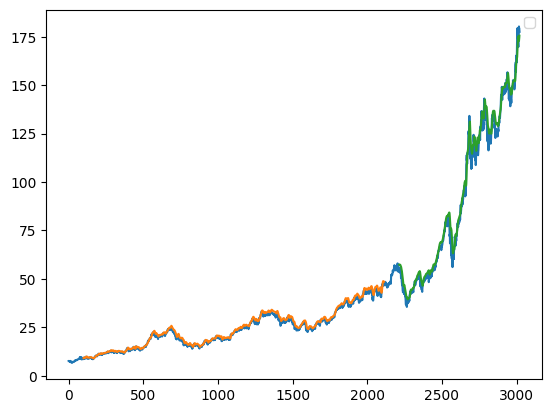

In [ ]:
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend()
plt.show()


In [ ]:
len(test_data)

907

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
from numpy import array

lst_output=[]
n_steps=100
i=0
year = 1//12
days = 60
while(i<days):
    
    if(len(temp_input)>100):
        # print(temp_input)
        x_input=np.array(temp_input[1:])
        # print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model1.predict(x_input)
        # print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model1.predict(x_input)
        # print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        # print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

# print(lst_output)

1/1 [==============================] - 0s 38ms/step


In [ ]:
y_test1 = []
past_100_days_testing = test_data[-100:]
temp = past_100_days_testing.reshape(1, 100, 1)
a = 100
days = 0

while days<60:
  if a == 100:
    y_predicted1 = model1.predict(temp)
    # print('100')
    # value = y_predicted1[0][0]
    # print(value)
    y_test1.append([y_predicted1[0][0]])
    temp = np.append(temp, [y_predicted1], axis=1)
    days = days+1
    a = 101
  else:
    # print('101')
    temp = np.delete(temp, 0, axis=1)
    a = 100
    

y_test1 = np.array(y_test1)
# print(y_test1)

1/1 [==============================] - 0s 32ms/step


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,days+101)

In [ ]:
# df[len(df)-100:]

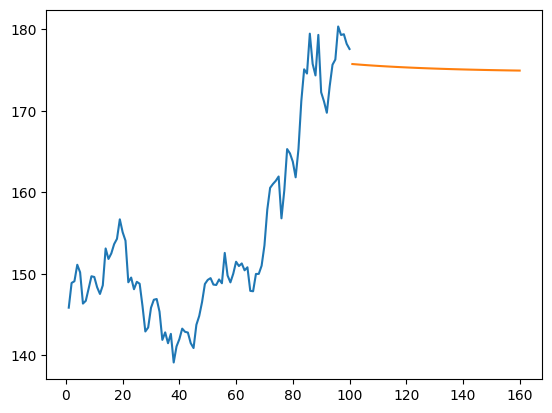

In [ ]:
plt.plot(day_new, scaler.inverse_transform(df[len(df)-100:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

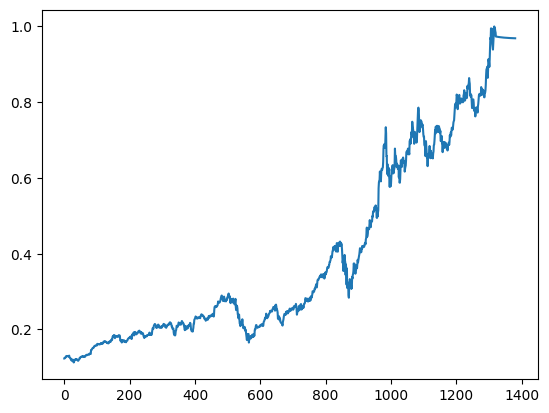

In [ ]:
df1=df.tolist()
df1.extend(lst_output)
plt.plot(df1[1700:])

In [ ]:
df1=scaler.inverse_transform(df1).tolist()

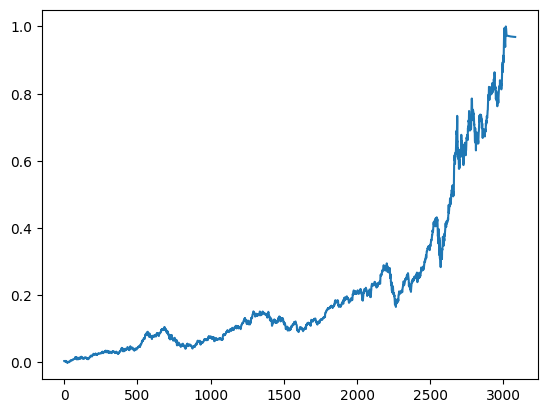

In [ ]:
plt.plot(df1)

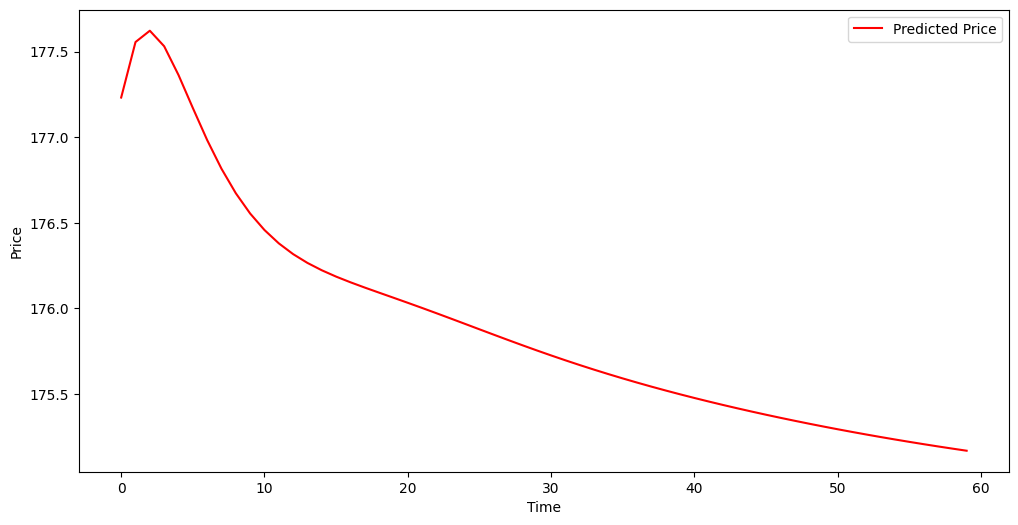

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# plot y_test and y_predicted on the first y-axis
ax1.plot(scaler.inverse_transform(y_test1), 'r', label='Predicted Price')
ax1.set_xlabel('Time')
ax1.set_ylabel('Price')
ax1.tick_params(axis='y')
ax1.legend()


# ax1.axvline(x=len(y_predicted)-0.5, color='black', linestyle='dashed')
# ax1.axvline(x=len(y_predicted)+0.5, color='black', linestyle='dashed')

plt.show()


In [ ]:
%%writefile app_LSTMFuture.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf
from datetime import date
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import streamlit as st
from numpy import array

st.title('Stock Trend Prediction')
start = '2010-01-01'
today = date.today().strftime("%Y-%m-%d")

user_input = st.text_input("Enter Stock Ticker", 'AAPL')
df = yf.download(user_input, start , today)

st.subheader("Data Overview")
st.write(df.describe())
df = df.reset_index()['Close']

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return np.array(dataX), np.array(dataY)


training_size = math.floor(int(len(df)*0.70))
test_size = len(df) - training_size
train_data, test_data = df[0:training_size,:],df[training_size:len(df),:1]

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

st.subheader('Closing Prive vs Time chart')
fig = plt.figure(figsize = (12,6))
plt.plot(scaler.inverse_transform(df))
st.pyplot(fig)

model1 = load_model('keras_model.h5')

train_predict = model1.predict(x_train)
test_predict = model1.predict(x_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

st.subheader('Closing Price vs Time chart showing predictions for training and testing data')
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(len(df)), scaler.inverse_transform(df), label='Actual')
ax.plot(range(len(df)), trainPredictPlot, label='Training Predictions')
ax.plot(range(len(df)), testPredictPlot, label='Testing Predictions')
ax.legend()
fig.suptitle('Closing Price vs Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price ($)')
fig.autofmt_xdate()
st.pyplot(fig)

x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=100
i=0
days = st.number_input("Enter number of days: ", 30)
while(i<days):
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model1.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model1.predict(x_input)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

day_new = np.arange(1, 101)
day_pred = np.arange(101, days + 101)

st.subheader('Closing Prive vs Time chart showing future predictions')
fig3, ax = plt.subplots(figsize=(12, 6))
ax.plot(day_new, scaler.inverse_transform(df[len(df)-100:]))
ax.plot(day_pred, scaler.inverse_transform(lst_output)) 
ax.set_xlabel('Time')
ax.set_ylabel('Closing Price')
ax.legend(['Actual Price', 'Predicted Price'])
st.pyplot(fig3)


Overwriting app_LSTMFuture.py


In [ ]:
!streamlit run app_LSTMFuture.py & npx localtunnel --port 8501

[##................] | loadDep:strip-ansi: sill resolveWithNewModule wrap-ansi@


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.56.54:8501

npx: installed 22 in 2.985s
your url is: https://salty-toys-obey-34-125-56-54.loca.lt
2023-03-30 21:46:46.004069: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 21:46:47.324105: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
[*********************100%***********************]  1 of 1 completed
2023-03-30 21:46:49.889124: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-03-30 21:4